# Making Maps using `Cartopy` 

`Cartopy` is a Python map plotting package.  Combined with `matplotlib` is works well for making contour plots of maps for Climate Data Analysis

This notebook will demonstrate how to make map contour plots using `Cartopy`

## Data

We return to our CMIP5 data for surface air temperature (tas) from the RCP4.5 scenario produced by the NCAR/CCSM4 model. For this example, we will again read the first ensemble member.

For the external tutorial, a subset of the data over the tropical Pacific is used.

In [2]:
import warnings

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

Read Data

In [3]:
path=''
fname='tas_Amon_CCSM4_rcp45_r1i1p1_2101-2299_mean.nc'
ds_mean=xr.open_dataset(path+fname)
ds_mean

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 192, lon: 288)
Coordinates:
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    height    float64 ...
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
    tas       (lat, lon) float32 ...

Let's take the mean temperature over the entire period for our plots

Previously, in the read-netcdf notebook, we just used plt.contour from `matplotlib`, like this:

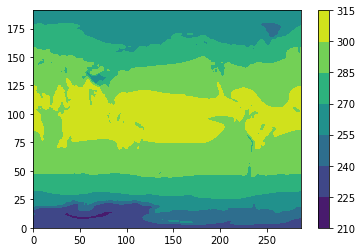

In [4]:
plt.contourf(ds_mean['tas'])
plt.colorbar()

## Plot with a map
However, we would like to plot this with map and control the map projection, label the lats and lons, etc.

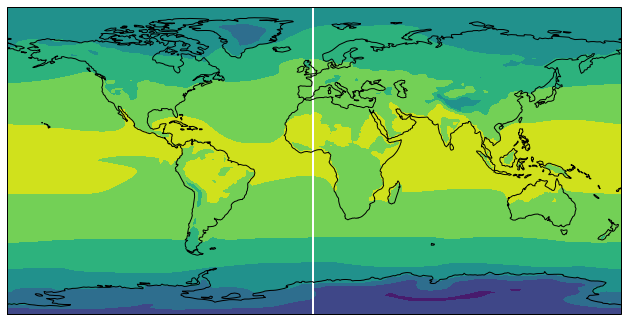

In [5]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
ax.contourf(ds_mean['lon'], ds_mean['lat'], ds_mean['tas'],
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

## Cyclic data and lat-lon labels

This figure has a couple of things we would like to change:
1. The stripe at 0 lon. This is due to the fact that `contourf` has no way to know that our data is cyclic in longitude.  We will fix this using `cartopy.util.add_cyclic_point`
2. No lat-lon labels. We will add lat-lon labels using `set_x(y)ticks` and `cticker`.

We set the lat-lon lables using `set_x(y)ticks` and `cticker`. We will fix the white strip using

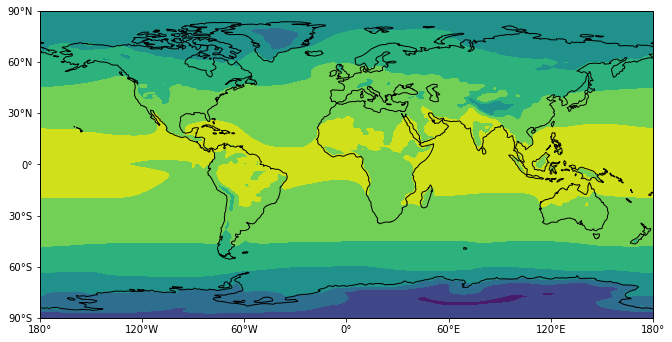

In [6]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['tas']
data, lons = add_cyclic_point(data, coord=ds_mean['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds_mean['lat'], data,
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

## Change the Colormap

The colors are not very nice for plotting temperature contours. Let's choose a different colormap and add a colorbar.  The [colormap options] https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html come from `matplotlib`.  I will choose one called `coolwarm`

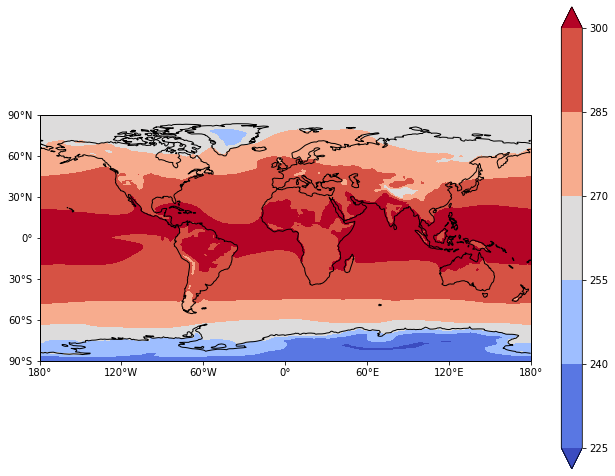

In [7]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['tas']
data, lons = add_cyclic_point(data, coord=ds_mean['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds_mean['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs)

## Change the Map Projection

Text(0.5, 1.0, 'NCAR-CCSM4 RCP4.5 2100-2299')

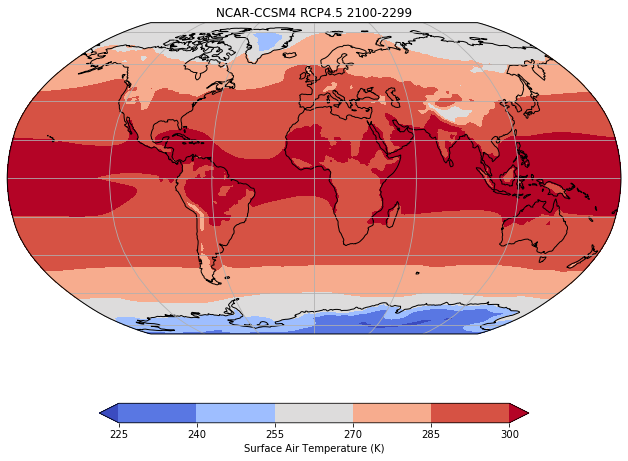

In [8]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())

# Add cyclic point to data
data=ds_mean['tas']
data, lons = add_cyclic_point(data, coord=ds_mean['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds_mean['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (K)')

# Add title
plt.title('NCAR-CCSM4 RCP4.5 2100-2299')